high Array size 1258
low Array size 1258
open Array size 1258
close Array size 1258
[ 27.610001  28.01      28.025    ... 127.900002 130.360001 133.      ]
508.795001
25.43975005
504.5400000000001
25.227000000000004
499.6575010000001
24.982875050000004
494.21750000000003
24.710875
489.38499900000005
24.469249950000002
485.984997
24.299249850000002
482.629995
24.13149975
479.487495
23.974374750000003
476.544994
23.8272497
473.92999399999997
23.696499699999997
471.767494
23.5883747
470.154994
23.507749699999998
470.60499500000003
23.530249750000003
471.99999600000007
23.599999800000003
473.65249700000004
23.682624850000003
475.2074970000001
23.760374850000005
476.02749700000004
23.801374850000002
476.9099960000001
23.845499800000006
478.07999700000005
23.90399985
479.557496
23.977874800000002
481.117496
24.0558748
482.497497
24.12487485
484.282496
24.2141248
486.404997
24.32024985
488.10999699999996
24.405499849999998
489.004998
24.4502499
489.917499
24.49587495
490.665001
24.53325005
49

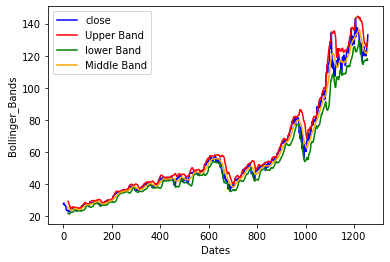

<Figure size 432x288 with 0 Axes>

In [45]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
df = pd.read_csv('../stock_data/AAPL.csv')
array_date = np.array(df['Date'])
array_close = np.array(df['Close'])
array_open = np.array(df['Open'])
array_high = np.array(df['High'])
array_low = np.array(df['Low'])
print("high Array size",array_high.size)
print("low Array size",array_low.size)
print("open Array size",array_open.size)
print("close Array size",array_close.size)
print(array_close)
Bperiods=19
y=0
array_Middleband=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
for x in range(0,array_close.size-Bperiods):
	sum=0
	for j in range(0,Bperiods+1): #upto 20 periods value
		z=array_close[y]
		sum=sum+z
		y=y+1
	print(sum)
	sum=sum/20
	print(sum)
	array_Middleband.append(sum)
	y=y-(Bperiods)
print(len(array_Middleband))
print(array_Middleband)
stndrd_deviation=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
y=0
z=0
for x in range(0,array_close.size-Bperiods):
	sum=0
	for j in range(0,Bperiods+1): #upto 20 periods value
		z=array_Middleband[x+Bperiods]
		sum=sum+((z-array_close[y])*(z-array_close[y]))
		y=y+1
	print(sum)
	sum=sum/19
	sum=math.sqrt(sum)
	print(sum)
	stndrd_deviation.append(sum)
	y=y-(Bperiods)
print(len(stndrd_deviation))
print(stndrd_deviation)
upper_band=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
lower_band=[None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
for x in range(Bperiods,len(stndrd_deviation)-1):
	upper_band.append(array_Middleband[x]+(2*stndrd_deviation[x]))
	lower_band.append(array_Middleband[x]-(2*stndrd_deviation[x]))
print(upper_band)
print(len(upper_band))
print(lower_band)
plt.plot(array_close,color='blue',label = 'close')
plt.plot(upper_band,color='red',label = 'Upper Band')
plt.plot(lower_band,color='green',label = 'lower Band')
plt.plot(array_Middleband,color='orange',label = 'Middle Band')
df['Date'] = df['Date'].reset_index()
x=df['Date'].index
labels = array_date[0:]
#plt.xticks(x, labels, rotation = 'vertical')
plt.ylabel('Bollinger_Bands')
plt.xlabel('Dates')
plt.legend()
plt.figure()
plt.show()
